Table of Contents: 
1. Importing Libraries and Dataframes
2. Grouping Data
- Grouping Data with Pandas
- Aggregating Data with agg()
- Performing multiple Aggregations
3. Aggregating Data with Transform
4. Deriving Columns with loc()
5. Find the aggregated mean of the “order_number” column grouped by “department_id” of entire dataframe 
6. Analyzing the result
7. Creating a loyalty flag for existing customers 
8. Determine whether the prices of products purchased by loyal customers differ from those purchased by regular or new customers
9. Creating a spending flag 
10. Creating a loyalty flag
11. Data Export


# 01. Importing Libraries and Dataframes

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
# disable a new warning with the following assignment
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# Importing Dataframes
path = r'C:\Users\franz\Documents\Exercise_4'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data', 'prepared_data', 'orders_products_incl_new_variables.pkl'))

 # 02. Grouping Data

In [4]:
# sing user-defined functions on a large dataframe can lead to memory issues or trouble with processing power. 
# And your Instacart dataframe is, indeed, large. To avoid any potential issues, let’s just work with a subset of the dataframe for now—the first one million rows.
df = ords_prods_merge[:1000000]

In [5]:
df.shape

(1000000, 21)

In [9]:
df.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,order_number,...,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,exists,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,0,1,Chocolate Sandwich Cookies,61,19,5.800781,1987,3139998,138,28,...,11,3.0,5,0,both,both,Mid-range product,Regularly busy,Regularly busy,Average orders
1,0,1,Chocolate Sandwich Cookies,61,19,5.800781,1989,1977647,138,30,...,17,20.0,1,1,both,both,Mid-range product,Regularly busy,Regularly busy,Average orders
2,0,1,Chocolate Sandwich Cookies,61,19,5.800781,11433,389851,709,2,...,21,6.0,20,0,both,both,Mid-range product,Busiest day,Busiest days,Average orders
3,0,1,Chocolate Sandwich Cookies,61,19,5.800781,12198,652770,764,1,...,13,NaN,10,0,both,both,Mid-range product,Regularly busy,Slowest days,Average orders
4,0,1,Chocolate Sandwich Cookies,61,19,5.800781,12200,1813452,764,3,...,17,9.0,11,1,both,both,Mid-range product,Least busy,Slowest days,Average orders


## 02.1 Grouping Data with Pandas

#### To recap, you should always use the groupby() function as part of a series of steps, namely, the following:

#### Split the data into groups based on some criteria.
#### Apply a function to each group separately.
####  Combine the results into a dataframe or alternative data structure or create a new column in the current dataframe.

In [11]:
df.groupby('product_name')

# So far, you’ve only completed the first step—splitting the data into groups (with the group being the “product_name” column).

## 02.2 Aggregating Data with agg()

#### Performing a Single Aggregation

In [12]:
##  If you were to calculate the mean of the “order_number” column grouped by the “department_id” column, you could quickly 
## compare the average number of orders across each Instacart department. 

## This will involve two of the steps in the three-step process introduced above:

## 1. Split the data into groups based on “department_id.”
## 2. Apply the agg() function to each group to obtain the mean values for the “order_number” column.

df.groupby('department_id').agg({'order_number': ['mean']})


,order_number
,mean
department_id,
1,15.577493
2,17.320781
3,16.084944
4,17.530458
5,14.763075
6,16.658449
7,17.031590
8,15.076662


In [13]:
# same result with a slightly different format using the mean function

df.groupby('department_id')['order_number'].mean()

#Denken Sie an den wesentlichen Unterschied in der Syntax zwischen den beiden Methoden: Wenn Sie agg() verwenden, setzen 
#Sie die Spalte, die Sie aggregieren möchten, als Argument in die Klammern der agg()-Funktion. Bei der Verwendung von mean()
#(oder einer anderen Standard-Aggregationsfunktion) geben Sie einfach die Spalte in eckigen Klammern an und fügen dann die 
#gewünschte Funktion nach dem Punkt ein.

department_id
1     15.577493
2     17.320781
3     16.084944
4     17.530458
5     14.763075
6     16.658449
7     17.031590
8     15.076662
9     15.447580
10    18.681852
11    15.447411
12    14.327957
13    16.548642
14    16.960241
15    16.121948
16    17.803851
17    15.593633
18    19.674252
19    16.899756
20    16.255442
21    25.535479
Name: order_number, dtype: float64

In [14]:
# Rather than including the column name within square brackets, as in the example above, you could also set the column name off with a dot, for instance:

df.groupby('department_id').order_number.mean()

#Using dot notation results in the same output as the function with brackets. Theoretically, then, you could use dot notation for your commands. However, there are a few reasons why we recommend sticking to square brackets as a general rule:
#Visuelles Erscheinungsbild: Eckige Klammern fallen auf, und ihre konsequente Verwendung hilft denjenigen, die sich Ihren Code später ansehen, Ihre Methoden zu verstehen. Wenn Sie plötzlich beschließen, für bestimmte Operationen die Punktschreibweise zu verwenden, wissen Ihre Kollegen nicht, ob Sie eine Funktion indizieren oder anwenden.
#Standard-Rolle: Eckige Klammern haben in Python keine andere Funktion als die Indizierung. Punkte hingegen schon (Anwendung von Pandas-Funktionen, Suche nach bestimmten Attributen eines Datenrahmens, usw.). Wenn Sie anfangen, die Punktnotation auch für die Indizierung zu verwenden, muss Python sich mehr anstrengen, um zu verstehen, was Sie ihm sagen wollen, was es langsamer machen kann.


department_id
1     15.577493
2     17.320781
3     16.084944
4     17.530458
5     14.763075
6     16.658449
7     17.031590
8     15.076662
9     15.447580
10    18.681852
11    15.447411
12    14.327957
13    16.548642
14    16.960241
15    16.121948
16    17.803851
17    15.593633
18    19.674252
19    16.899756
20    16.255442
21    25.535479
Name: order_number, dtype: float64

## 02.3 Performing multiple Aggregations

In [15]:
df.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
1                15.577493   1  99
2                17.320781   1  96
3                16.084944   1  99
4                17.530458   1  99
5                14.763075   1  99
6                16.658449   1  99
7                17.031590   1  99
8                15.076662   1  98
9                15.447580   1  99
10               18.681852   1  99
11               15.447411   1  99
12               14.327957   1  99
13               16.548642   1  99
14               16.960241   1  99
15               16.121948   1  99
16               17.803851   1  99
17               15.593633   1  99
18               19.674252   1  99
19               16.899756   1  99
20               16.255442   1  99
21               25.535479   1  98

# 3. Aggregating Data with Transform

Now that you know how to perform aggregations using the agg() and groupby() functions, let’s look into the last step of the process by using the results to create a flag.

In [ ]:
#If the maximum orders the user has made is over 40, then the customer will be labeled a “Loyal customer.”
#If the maximum orders the user has made is over 10 but less than or equal to 40, then the customer will be labeled a “Regular customer.”
#If the maximum orders the user has made is less than or equal to 10, then the customer will be labeled a “New customer.”

In [5]:
# Let’s run through each piece of the code in turn. First, a new column called “max_order” is created, which will be what 
# stores the maximum order number for each user (step 3). Then, the ords_prods_merge dataframe is grouped by the “user_id” 
# column (step 1). And finally, the transform() function is applied on the “order_number” column with the np.max argument 
#(step 2).

#But what is this np? This is actually the NumPy library! Remember the import code you include at the beginning of every 
#notebook? In that code, you assigned the NumPy library to the np variable. Now, you’re finally going to use that variable.
#The max() function is a function included within NumPy that finds the max value within a column. Including this as an
#argument within the transform() function tells Python to “transform the ‘order_number’ column by applying the max() 
#function from the NumPy library.”

# You’ve been asked to locate these loyalty customers at Instacart so that the business strategy team can employ some kind 
# of bonus point program for them. You’ll do this by first using the transform() function, which will create a new column 
# containing the maximum frequency of the “order_number” column, and then using the loc() function, which will create a 
# second column containing a flag designating whether a customer is “loyal” or not.

ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [7]:
ords_prods_merge.head(1)

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,order_number,...,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,exists,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,0,1,Chocolate Sandwich Cookies,61,19,5.800781,1987,3139998,138,28,...,11,3.0,5,0,both,both,Mid-range product,Regularly busy,Regularly busy,Average orders


# 4. Deriving Columns with loc()
#### With your new column ready to go, all that’s left is to create a flag that assigns a “loyalty” label to a user ID based on its corresponding max order value.

In [7]:
# dropping rows with price value > 25
ords_prods_merge.drop(ords_prods_merge.loc[ords_prods_merge['prices']>25].index, inplace=True)

In [8]:
ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal_Customer'
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [9]:
ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

Regular customer    15874128
Loyal_Customer      10282763
New customer         6242841
Name: loyalty_flag, dtype: int64

In [24]:
# Alternativweg um Spalten anzuzeigen ohne head(), das die ganze Tabelle anzeigt
ords_prods_merge[['user_id', 'loyalty_flag', 'order_number']].head(60)

,user_id,loyalty_flag,order_number
0,138,Regular customer,28
1,138,Regular customer,30
2,709,New customer,2
3,764,New customer,1
4,764,New customer,3
5,777,Regular customer,16
6,825,New customer,3
7,910,Regular customer,12
8,1052,Regular customer,10
9,1052,Regular customer,15


In [ ]:
# While this may seem somewhat complicated, if you look more closely, you’ll see that it’s all things you’ve dealt with 
# before—just all at the same time. The first set of brackets is the same as the brackets used in df['column'] above, while
# the second set of brackets is indicating that what you’re indexing is a list of multiple columns (and lists are always 
# included within brackets). This is why there are two sets of brackets.

## 5. Find the aggregated mean of the “order_number” column grouped by “department_id” of entire dataframe 


In [3]:
ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


## 6. Analyzing the result

How do the results for the entire dataframe differ from those of the subset? Include your comments in a markdown cell below the executed code.

The trends have remained more or less the same, some departments have improved, some have deteriorated. This is due to more meaningful statistics when all available data are included. It is also interesting that the maximum value has risen from about 22 to 25.

## 7. Creating a loyalty flag for existing customers 

#### Done previously, see code above.

## 8. Determine whether the prices of products purchased by loyal customers differ from those purchased by regular or new customers


The marketing team at Instacart wants to know whether there’s a difference between the spending habits of the three types of customers you identified. Use the loyalty flag you created and check the basic statistics of the product prices for each loyalty category (Loyal Customer, Regular Customer, and New Customer). What you’re trying to determine is whether the prices of products purchased by loyal customers differ from those purchased by regular or new customers.


In [11]:
# create a new column with the maximum, minimum and mean prices of each user id
ords_prods_merge['max_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.max)
ords_prods_merge['min_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.min)
ords_prods_merge['mean_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

In [12]:
# reviewing the new created columns
ords_prods_merge[['user_id', 'loyalty_flag', 'max_price', 'min_price', 'mean_price']].head(5)

,user_id,loyalty_flag,max_price,min_price,mean_price
0,138,Regular customer,20.0,1.299805,6.937500
1,138,Regular customer,20.0,1.299805,6.937500
2,709,New customer,18.5,1.299805,7.929688
3,764,New customer,14.0,1.700195,4.972656
4,764,New customer,14.0,1.700195,4.972656


In [20]:
ords_prods_merge.groupby('loyalty_flag').agg({'max_price': ['mean']})

,max_price
,mean
loyalty_flag,
Loyal_Customer,20.37500
New customer,17.56250
Regular customer,19.46875


In [21]:
ords_prods_merge.groupby('loyalty_flag').agg({'min_price': ['mean']})

,min_price
,mean
loyalty_flag,
Loyal_Customer,1.085938
New customer,1.303711
Regular customer,1.140625


In [19]:
ords_prods_merge.groupby('loyalty_flag').agg({'mean_price': ['mean']})

,mean_price
,mean
loyalty_flag,
Loyal_Customer,7.773438
New customer,7.800781
Regular customer,7.796875


##  9. Creating a spending flag 

The team now wants to target different types of spenders in their marketing campaigns. This can be achieved by looking at the prices of the items people are buying. Create a spending flag for each user based on the average price across all their orders using the following criteria:

If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”

f the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”

In [12]:
# creating spending flags
ords_prods_merge.loc[ords_prods_merge['mean_price'] < 10, 'spending_flag'] = 'Low Spender'
ords_prods_merge.loc[ords_prods_merge['mean_price'] >= 10, 'spending_flag'] = 'High Spender'

In [13]:
ords_prods_merge['spending_flag'].value_counts(dropna = False)

Low Spender     31770219
High Spender      575296
NaN                59344
Name: spending_flag, dtype: int64

#### We have 5933 NaN values here, I guess they are caused by empty cells

In [7]:
# verifying my new column
ords_prods_merge[['user_id', 'mean_price', 'spending_flag']].head(5)

,user_id,mean_price,spending_flag
0,138,6.937500,Low Spender
1,138,6.937500,Low Spender
2,709,7.929688,Low Spender
3,764,4.972656,Low Spender
4,764,4.972656,Low Spender


## 10. Creating a loyalty flag

In order to send relevant notifications to users within the app (for instance, asking users if they want to buy the same item again), the Instacart team wants you to determine frequent versus non-frequent customers. Create an order frequency flag that marks the regularity of a user’s ordering behavior according to the median in the “days_since_prior_order” column. The criteria for the flag should be as follows:

If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”

If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”

If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”

In [22]:
# creating a new column with the meadian of the days_since_prio_order for each user
ords_prods_merge['median_days_since_prior_order'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [23]:
# verifying my new column
ords_prods_merge[['user_id', 'median_days_since_prior_order']].head(5)

,user_id,median_days_since_prior_order
0,138,8.0
1,138,8.0
2,709,8.0
3,764,9.0
4,764,9.0


In [24]:
# creating order frequency flags
ords_prods_merge.loc[ords_prods_merge['median_days_since_prior_order'] > 20, 'order_frequency_flag'] = 'Non-frequent customer'
ords_prods_merge.loc[(ords_prods_merge['median_days_since_prior_order'] > 10) & (ords_prods_merge['median_days_since_prior_order'] <= 20), 'order_frequency_flag'] = 'Regular customer'
ords_prods_merge.loc[ords_prods_merge['median_days_since_prior_order'] <= 10, 'order_frequency_flag'] = 'Frequent customer'

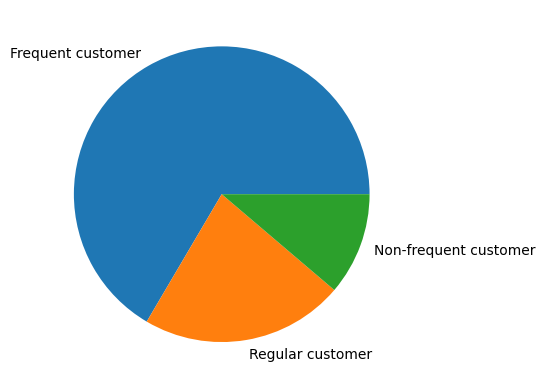

In [29]:
order_frequency = ords_prods_merge['order_frequency_flag'].value_counts().plot.pie(label = '')

In [17]:
# verifying my new flag
ords_prods_merge[['user_id', 'median_days_since_prior_order', 'order_frequency_flag']].head(60)

,user_id,median_days_since_prior_order,order_frequency_flag
0,138,8.0,Frequent customer
1,138,8.0,Frequent customer
2,709,8.0,Frequent customer
3,764,9.0,Frequent customer
4,764,9.0,Frequent customer
5,777,11.0,Regular customer
6,825,20.0,Regular customer
7,910,6.0,Frequent customer
8,1052,10.0,Frequent customer
9,1052,10.0,Frequent customer


## 11. Data Export

In [18]:
# Data Export: 
ords_prods_merge.to_pickle(os.path.join(path, '02_data','prepared_data', 'orders_products_incl_new_variables_4.8.pkl'))

In [ ]:
ords_prods_merge_old = pd.read_pickle(os.path.join(path, '02_Data', 'prepared_data', 'orders_products_incl_new_variables_4.9_dropped.pkl'))

In [30]:
ords_prods_merge.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0_y', 'order_id', 'user_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'exists', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'max_price',
       'min_price', 'mean_price', 'median_days_since_prior_order',
       'order_frequency_flag'],
      dtype='object')

In [ ]:
ords_prods_merge_old = pd.read_pickle(os.path.join(path, '02_Data', 'prepared_data', 'orders_products_incl_new_variables_4.9_dropped.pkl'))